# Module 1 — Fondements Mathématiques pour le Machine Learning
**Auteur:** Dr. Michel MAMA TOULOU, Expert en Intelligence Artificielle

Ce notebook couvre :
- 1.1 Algèbre linéaire : vecteurs, matrices, valeurs propres, formes quadratiques
- 1.2 Calcul différentiel & optimisation : gradient, Hessienne, descente de gradient, Newton, KKT (introduction)
- 1.3 Probabilités & statistiques : distributions, loi des grands nombres, TCL, MLE, covariance

## 1.1 Algèbre Linéaire — Vecteurs et opérations de base

Définitions: espace vectoriel, addition, multiplication scalaire, produit scalaire et norme.

*   **Espace Vectoriel:** Un ensemble V sur lequel sont définies deux opérations : l'addition vectorielle et la multiplication scalaire.
*   **Addition Vectorielle:**  u + v, où u, v ∈ V
*   **Multiplication Scalaire:**  αv, où α est un scalaire et v ∈ V
*   **Produit Scalaire:**  ⟨u, v⟩ = ||u|| ||v|| cos(θ), où θ est l'angle entre u et v. En coordonnées cartésiennes : ⟨u, v⟩ = Σᵢ uᵢvᵢ
*   **Norme:**  ||v|| = √(⟨v, v⟩) = √(Σᵢ vᵢ²)

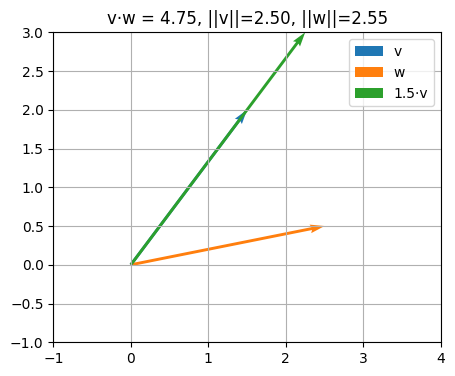

In [2]:
# Visualisation 2D : vecteurs, addition et produit scalaire
import numpy as np
import matplotlib.pyplot as plt

v = np.array([1.5, 2.0])
w = np.array([2.5, 0.5])
s = 1.5
dot = v.dot(w)
norm_v = np.linalg.norm(v)
norm_w = np.linalg.norm(w)

fig, ax = plt.subplots(figsize=(5,5))
ax.quiver(0,0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='C0', label='v')
ax.quiver(0,0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='C1', label='w')
ax.quiver(0,0, s*v[0], s*v[1], angles='xy', scale_units='xy', scale=1, color='C2', label=f'{s}·v')
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)
ax.grid(True)
ax.set_aspect('equal')
ax.legend()
ax.set_title(f'v·w = {dot:.2f}, ||v||={norm_v:.2f}, ||w||={norm_w:.2f}')
plt.show()

### Matrices, multiplication et valeurs propres — décomposition spectrale

Définitions: multiplication matricielle, inverses (si existant), valeurs propres λ et vecteurs propres v tels que Av = λv.

*   **Multiplication Matricielle:** (AB)ᵢⱼ = Σₖ AᵢₖBₖⱼ
*   **Inverse Matricielle:** AA⁻¹ = A⁻¹A = I, où I est la matrice identité.
*   **Valeurs Propres et Vecteurs Propres:** Av = λv, où A est une matrice, v est un vecteur propre, et λ est une valeur propre.

Eigenvalues: [1.2 3.8]
Eigenvectors:
 [[ 0.5547002  -0.83205029]
 [-0.83205029 -0.5547002 ]]


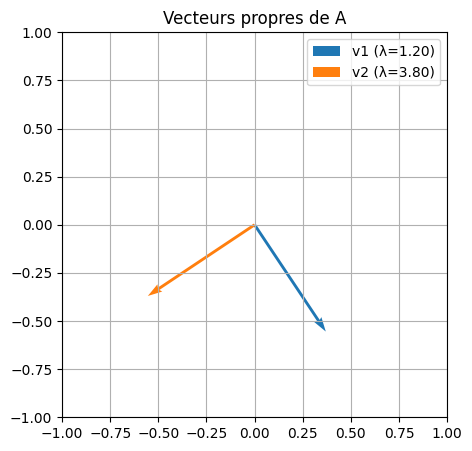

In [3]:
# Spectral decomposition simple et visualisation des vecteurs propres pour une matrice symétrique 2x2
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3.0, 1.2],[1.2, 2.0]])  # symmetric -> real eigen decomposition
w, v = np.linalg.eigh(A)  # w: eigenvalues, v: columns are eigenvectors

print('Eigenvalues:', w)
print('Eigenvectors:\n', v)

fig, ax = plt.subplots(figsize=(5,5))
origin = np.zeros(2)
ax.quiver(*origin, v[0,0], v[1,0], color='C0', scale=3, label=f'v1 (λ={w[0]:.2f})')
ax.quiver(*origin, v[0,1], v[1,1], color='C1', scale=3, label=f'v2 (λ={w[1]:.2f})')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
ax.set_title('Vecteurs propres de A')
plt.show()

### Formes quadratiques et définie positive/negative

La forme quadratique associée à une matrice symétrique A est x^T A x. Sa signe dépend des valeurs propres de A.

*   **Forme Quadratique:** q(x) = xᵀAx, où A est une matrice symétrique.
*   **Définie Positive:** Une matrice A est définie positive si xᵀAx > 0 pour tout x ≠ 0. Cela implique que toutes les valeurs propres de A sont positives.
*   **Définie Négative:** Une matrice A est définie négative si xᵀAx < 0 pour tout x ≠ 0. Cela implique que toutes les valeurs propres de A sont négatives.

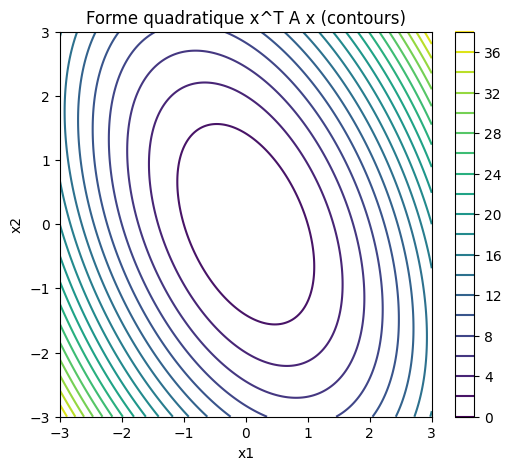

In [4]:
# Contour plot d'une forme quadratique x^T A x
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2.0, 0.6],[0.6, 1.0]])
def q(x):
    return x.T.dot(A).dot(x)

xs = np.linspace(-3,3,200)
Xg, Yg = np.meshgrid(xs, xs)
Z = np.zeros_like(Xg)
for i in range(Xg.shape[0]):
    for j in range(Xg.shape[1]):
        x = np.array([Xg[i,j], Yg[i,j]])
        Z[i,j] = q(x)

plt.figure(figsize=(6,5))
cs = plt.contour(Xg, Yg, Z, levels=20)
plt.colorbar(cs)
plt.title('Forme quadratique x^T A x (contours)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 1.2 Calcul différentiel & optimisation — gradients, Hessienne, convexité

Notions: gradient ∇f, dérivées partielles, Hessienne H(f), convexité (H positive semidefinie), conditions d'optimalité.

*   **Gradient:** ∇f = [∂f/∂x₁, ∂f/∂x₂, ..., ∂f/∂xₙ]ᵀ, où ∂f/∂xᵢ est la dérivée partielle de f par rapport à xᵢ.
*   **Hessienne:** H(f)ᵢⱼ = ∂²f/(∂xᵢ∂xⱼ), la matrice des dérivées partielles secondes.
*   **Convexité:** Une fonction f est convexe si pour tout x, y et tout t ∈ [0, 1], f(tx + (1-t)y) ≤ tf(x) + (1-t)f(y). Une condition suffisante est que la Hessienne soit semi-définie positive.
*   **Conditions d'Optimalité:** Pour un minimum local, ∇f(x) = 0 et H(f)(x) est semi-définie positive.

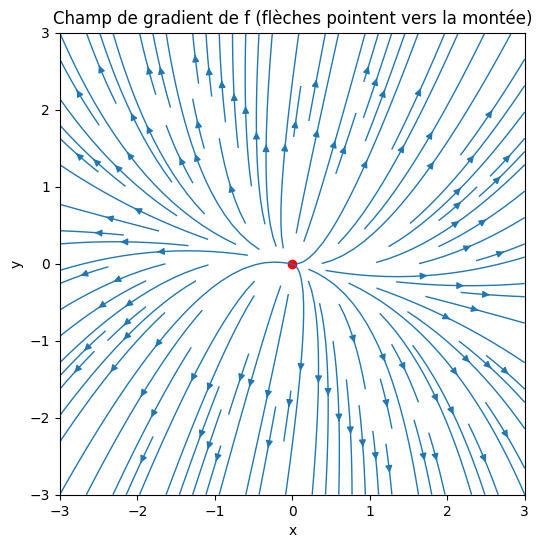

In [5]:
# Gradient field demonstration for f(x,y) = x^2 + 2*y^2 + 0.5*x*y
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return x**2 + 2*y**2 + 0.5*x*y
def grad(x,y):
    df_dx = 2*x + 0.5*y
    df_dy = 4*y + 0.5*x
    return np.array([df_dx, df_dy])

xs = np.linspace(-3,3,25)
Xg, Yg = np.meshgrid(xs, xs)
U = np.zeros_like(Xg)
V = np.zeros_like(Yg)
for i in range(Xg.shape[0]):
    for j in range(Xg.shape[1]):
        g = grad(Xg[i,j], Yg[i,j])
        U[i,j] = g[0]
        V[i,j] = g[1]

plt.figure(figsize=(6,6))
plt.streamplot(Xg, Yg, U, V, density=1.2, linewidth=1)
plt.scatter(0,0, color='red')
plt.title('Champ de gradient de f (flèches pointent vers la montée)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Hessienne et convexité (exemple quadratique)

Pour f(x)=1/2 x^T A x + b^T x + c, Hessienne = A. Si A est définie positive alors f est convexe.

*   **Fonction Quadratique:** f(x) = (1/2)xᵀAx + bᵀx + c
*   **Hessienne de f(x):** H(f) = A
*   **Convexité:** Si A est définie positive (toutes les valeurs propres sont positives), alors f(x) est convexe.

In [6]:
# Calcul de la Hessienne et vérification des valeurs propres
import numpy as np

A = np.array([[3.0, 1.0],[1.0, 2.0]])
eigvals = np.linalg.eigvalsh(A)
print('Hessienne A:\n', A)
print('Valeurs propres de A:', eigvals, '=> A est définie positive' if np.all(eigvals>0) else 'non')

Hessienne A:
 [[3. 1.]
 [1. 2.]]
Valeurs propres de A: [1.38196601 3.61803399] => A est définie positive


### Descente de gradient — démonstration numérique (2D quadratique)

Mise en oeuvre: itérations θ := θ - α ∇f(θ). Visualiser trajectoire et décroissance du coût.

*   **Descente de Gradient:** θ := θ - α∇f(θ), où θ est le vecteur des paramètres, α est le taux d'apprentissage, et ∇f(θ) est le gradient de la fonction de coût par rapport à θ.

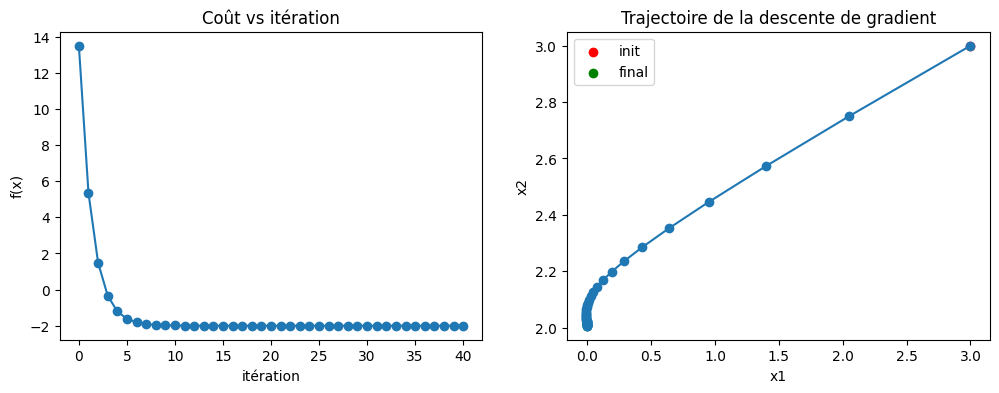

In [7]:
# Gradient descent on f(x) = 1/2 x^T A x - b^T x
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[3.0, 0.5],[0.5, 1.0]])
b = np.array([1.0, 2.0])
def f(x):
    return 0.5 * x.T.dot(A).dot(x) - b.dot(x)
def grad(x):
    return A.dot(x) - b

x = np.array([3.0, 3.0])
alpha = 0.1
xs = [x.copy()]
costs = [f(x)]
for i in range(40):
    x = x - alpha * grad(x)
    xs.append(x.copy())
    costs.append(f(x))

xs = np.array(xs)
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(costs, '-o')
ax[0].set_title('Coût vs itération')
ax[0].set_ylabel('f(x)')
ax[0].set_xlabel('itération')

ax[1].plot(xs[:,0], xs[:,1], '-o')
ax[1].scatter(xs[0,0], xs[0,1], color='red', label='init')
ax[1].scatter(xs[-1,0], xs[-1,1], color='green', label='final')
ax[1].set_title('Trajectoire de la descente de gradient')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].legend()
plt.show()

## 1.3 Probabilités et Statistiques — variables aléatoires, lois et inferénce

Notions: variables aléatoires, distributions (discrètes/continues), moments, covariance, loi des grands nombres et théorème central limite.

*   **Variable Aléatoire:** Une variable dont la valeur est le résultat numérique d'un phénomène aléatoire.
*   **Espérance (Moyenne):** E[X] = Σ xP(X=x) (discret) ou ∫ xf(x) dx (continu), où f(x) est la densité de probabilité.
*   **Variance:** Var(X) = E[(X - E[X])²] = E[X²] - (E[X])²
*   **Loi des Grands Nombres (LLN):** La moyenne empirique converge vers l'espérance théorique lorsque le nombre d'échantillons tend vers l'infini.
*   **Théorème Central Limite (TCL):** La somme (ou la moyenne) d'un grand nombre de variables aléatoires indépendantes et identiquement distribuées converge vers une distribution normale.

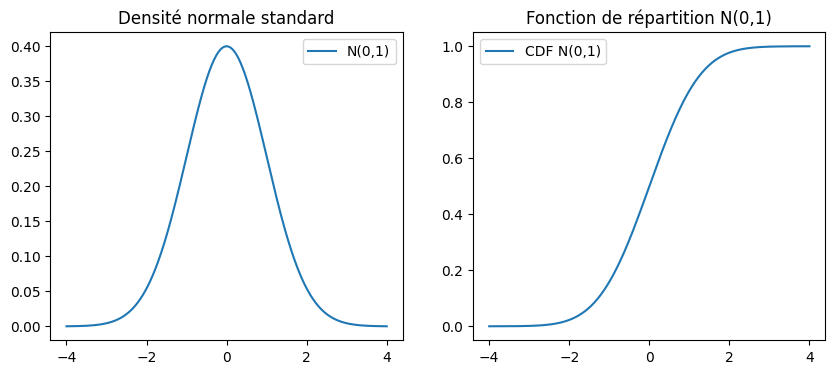

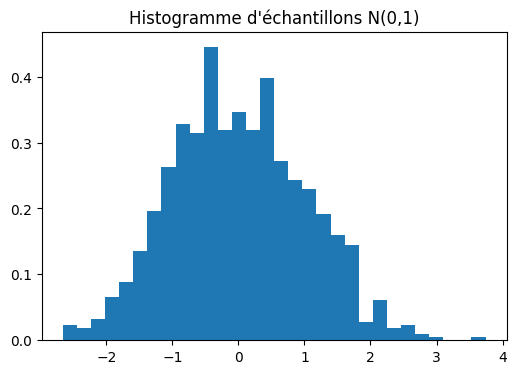

In [8]:
# Exemples de distributions (densités et échantillons) : Normal & Uniforme
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

x = np.linspace(-4,4,400)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x,0,1), label='N(0,1)')
plt.title('Densité normale standard')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x, norm.cdf(x,0,1), label='CDF N(0,1)')
plt.title('Fonction de répartition N(0,1)')
plt.legend()
plt.show()

samples = np.random.randn(1000)
plt.figure(figsize=(6,4))
plt.hist(samples, bins=30, density=True)
plt.title('Histogramme d\'échantillons N(0,1)')
plt.show()

### Loi des grands nombres et Théorème Central Limite (simulation)

On simule moyennes d'échantillons et on observe la convergence vers l'espérance (LLN) et la distribution approchée normale des moyennes (TCL).

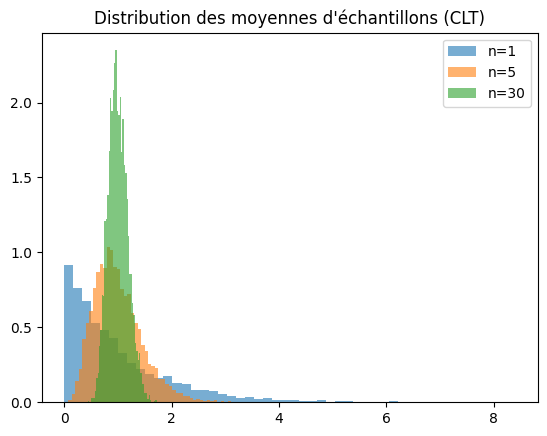

In [9]:
# Simulation LLN & CLT
import numpy as np
import matplotlib.pyplot as plt

def sample_means(n_samples, sample_size):
    means = [np.mean(np.random.exponential(scale=1.0, size=sample_size)) for _ in range(n_samples)]
    return np.array(means)

for m in [1,5,30]:
    means = sample_means(5000, m)
    plt.hist(means, bins=50, alpha=0.6, density=True, label=f'n={m}')
plt.title('Distribution des moyennes d\'échantillons (CLT)')
plt.legend()
plt.show()

### Covariance, corrélation et matrice de covariance

Définition: Cov(X,Y) = E[(X-μX)(Y-μY)]. La matrice de covariance est clé pour PCA et estimation de dispersion.

*   **Covariance:** Cov(X, Y) = E[(X - μₓ)(Y - μᵧ)], où μₓ et μᵧ sont les moyennes de X et Y respectivement.
*   **Corrélation:** Corr(X, Y) = Cov(X, Y) / (σₓσᵧ), où σₓ et σᵧ sont les écarts types de X et Y respectivement.
*   **Matrice de Covariance:** Une matrice dont l'élément (i, j) est la covariance entre la i-ème et la j-ème variable aléatoire.

Covariance matrix:
 [[0.94948679 0.78754986 0.23829762]
 [0.78754986 0.99113375 0.12636976]
 [0.23829762 0.12636976 0.97262964]]


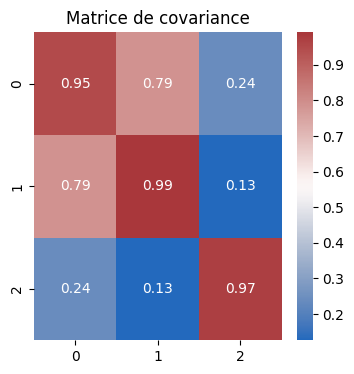

In [10]:
# Exemples : matrice de covariance et heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0,0,0], cov=[[1,0.8,0.3],[0.8,1,0.2],[0.3,0.2,1]], size=500)
cov = np.cov(X, rowvar=False)
print('Covariance matrix:\n', cov)
plt.figure(figsize=(4,4))
sns.heatmap(cov, annot=True, cmap='vlag')
plt.title('Matrice de covariance')
plt.show()

### Estimation (MLE) pour la moyenne d'une normale — démonstration simple

MLE pour μ d'une N(μ, σ^2) avec σ connu est la moyenne empirique. On illustre la maximisation de la log-vraisemblance.

*   **Estimateur du Maximum de Vraisemblance (MLE):**  argmax θ L(θ; data), où L est la fonction de vraisemblance.
*   **Log-Vraisemblance pour une Normale:** Pour un échantillon x₁, ..., xₙ i.i.d. de N(μ, σ²), la log-vraisemblance est Σᵢ log(f(xᵢ; μ, σ²)), où f est la densité normale.
*   **MLE pour μ (σ connu):** Pour une N(μ, σ²), l'estimateur MLE de μ est la moyenne empirique: μ̂ = (1/n)Σᵢ xᵢ.

True mu=1.5, MLE mu=1.621


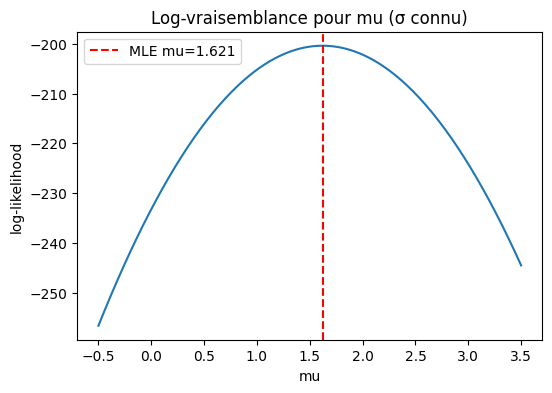

In [11]:
# MLE estimation for normal mean (sigma known)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.RandomState(1)
sigma = 2.0
true_mu = 1.5
data = rng.normal(loc=true_mu, scale=sigma, size=100)
mle_mu = data.mean()
print(f'True mu={true_mu}, MLE mu={mle_mu:.3f}')

# plot log-likelihood as function of mu
mus = np.linspace(true_mu-2, true_mu+2, 200)
ll = [np.sum(norm.logpdf(data, loc=mu, scale=sigma)) for mu in mus]
plt.figure(figsize=(6,4))
plt.plot(mus, ll)
plt.axvline(mle_mu, color='red', linestyle='--', label=f'MLE mu={mle_mu:.3f}')
plt.title('Log-vraisemblance pour mu (σ connu)')
plt.xlabel('mu')
plt.ylabel('log-likelihood')
plt.legend()
plt.show()

## Remarques finales et ressources

- Ce notebook propose des démonstrations numériques et graphiques des fondements mathématiques utiles au ML.
- Pour approfondir : livres d'algèbre linéaire (Strang), optimisation convexe (Boyd & Vandenberghe), probabilité (Casella & Berger).
- Exécuter les cellules dans l'ordre et installer les dépendances (numpy, matplotlib, seaborn, scipy).

## Liens utiles pour la documentation

*   **Numpy :** [https://numpy.org/doc/](https://numpy.org/doc/)
*   **Scipy :** [https://docs.scipy.org/doc/](https://docs.scipy.org/doc/)
*   **Matplotlib :** [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
*   **Seaborn :** [https://seaborn.pydata.org/](https://seaborn.pydata.org/)